In [1]:
import numpy as np
import pandas as pd 

In [8]:
df = pd.read_csv('train.csv')

In [10]:
df.head(5)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [11]:
df.shape

(19237, 18)

In [12]:
df = df[(df['Fuel type']!='Diesel') & (df['Prod. year'] >= 2005)]

In [13]:
df.shape

(13107, 18)

In [14]:
df.tail(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19224,45768089,19130,-,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
19229,39977395,50,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.0,Automatic,Front,04-May,Left wheel,Silver,6
19230,45760891,470,645,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


In [16]:
y = sum(int(x) for x in df['Levy'] if x!='-')

print(f"The avg of Levy column is {round(y/df.shape[0], 2)}")

The avg of Levy column is 681.33


In [46]:
train_set = pd.read_csv('train.csv')

In [47]:
train_set.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [48]:

import matplotlib.pyplot as plt

# Clean the 'Mileage' column: remove ' km' and commas, and convert to float
train_set['Mileage'] = train_set['Mileage'].astype(str).str.replace(' km', '').str.replace(',', '').astype(float)

# Clean the 'Levy' column: replace '-' with NaN, remove commas, and convert to float
train_set['Levy'] = train_set['Levy'].astype(str).replace('-', np.nan).str.replace(',', '').astype(float)

# Ensure 'Engine volume', 'Cylinders', and 'Airbags' columns are numeric
train_set['Engine volume'] = pd.to_numeric(train_set['Engine volume'], errors='coerce')
train_set['Cylinders'] = pd.to_numeric(train_set['Cylinders'], errors='coerce')
train_set['Airbags'] = pd.to_numeric(train_set['Airbags'], errors='coerce')

# Drop rows with NaN values in the selected columns (optional step)
train_set.dropna(subset=['Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Price'], inplace=True)


In [49]:

# Split data into Train (90%) and Test (10%) sets
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(train_set, test_size=0.1, random_state=42)

# Prepare feature matrix (X) and target vector (y) for Train and Test sets
X_train = train_data[['Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']].values
y_train = train_data['Price'].values
X_test = test_data[['Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']].values
y_test = test_data['Price'].values

# Feature scaling function
def feature_scaling(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Apply feature scaling to X_train and X_test
X_train_scaled = feature_scaling(X_train)
X_test_scaled = feature_scaling(X_test)

# Add a bias column (intercept term) to X_train and X_test
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]  # Add a column of 1s for the bias term
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]



In [41]:
# Gradient descent function
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape  # m = number of samples, n = number of features
    theta = np.zeros(n)  # Initialize weights
    cost_history = []

    for epoch in range(epochs):
        # Predictions
        predictions = X.dot(theta)
        # Compute the error
        error = predictions - y
        # Update theta
        gradient = (1 / m) * X.T.dot(error)
        theta -= learning_rate * gradient
        # Calculate cost (Mean Squared Error)
        cost = (1 / (2 * m)) * np.sum(error**2)
        cost_history.append(cost)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Cost = {cost}")

    return theta, cost_history



In [50]:
# Train the model using gradient descent
learning_rate = 0.01
epochs = 1000
theta, cost_history = gradient_descent(X_train_scaled, y_train, learning_rate, epochs)

# Print the final weights (theta)
print("Trained weights (theta):", theta)



Epoch 0: Cost = 315257630.9118604
Epoch 100: Cost = 188377734.53812966
Epoch 200: Cost = 170988946.60970733
Epoch 300: Cost = 168454714.94108635
Epoch 400: Cost = 167986794.43251175
Epoch 500: Cost = 167837646.5756475
Epoch 600: Cost = 167757641.5374792
Epoch 700: Cost = 167704593.86680514
Epoch 800: Cost = 167667370.2109743
Epoch 900: Cost = 167640844.2031009
Trained weights (theta): [16562.37542022  1719.26743479  2000.42524203  -224.69533654
 -2440.42978178 -4227.30121039]


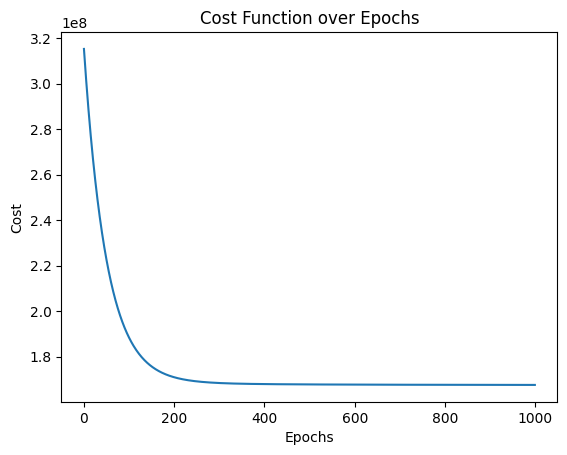

In [51]:
# Cost history visualization
plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function over Epochs')
plt.show()




In [52]:
# Make predictions on the Test set
predictions = X_test_scaled.dot(theta)

# Evaluate the model: Calculate the cost (loss) on the Test set
def calculate_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error**2)
    return cost

test_cost = calculate_cost(X_test_scaled, y_test, theta)
print("Test set cost (MSE):", test_cost)


Test set cost (MSE): 144635229.07634664
